In [6]:
import xarray
import intake
import util 

In [7]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

glade-cmip6-ESM Collection with 698724 entries:
	> 13 activity_id(s)

	> 24 institution_id(s)

	> 47 source_id(s)

	> 68 experiment_id(s)

	> 162 member_id(s)

	> 35 table_id(s)

	> 1027 variable_id(s)

	> 12 grid_label(s)

	> 59 dcpp_init_year(s)

	> 248 version(s)

	> 6813 time_range(s)

	> 698724 path(s)

In [10]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 68,
                   'values': ['ssp370', 'histSST-piNTCF', 'histSST',
                              'histSST-1950HC', 'hist-1950HC', 'hist-piNTCF',
                              'piClim-NTCF', 'ssp370SST-lowNTCF',
                              'ssp370-lowNTCF', 'ssp370SST', '1pctCO2-bgc',
                              'hist-bgc', 'esm-ssp585', 'amip-future4K',
                              'amip-m4K', 'a4SST', 'aqua-p4K', 'piSST',
                              'amip-4xCO2', 'a4SSTice', 'amip-p4K',
                              'aqua-control', 'aqua-4xCO2', 'abrupt-4xCO2',
                              'historical', 'piControl', 'amip', '1pctCO2',
                              'esm-hist', 'esm-piControl', 'ssp245', 'ssp585',
                              'ssp126', 'hist-GHG', 'hist-aer',
                              'dcppA-hindcast', 'dcppC-hindcast-noPinatubo',
                              'dcppC-hindcast-noElChichon', 'dcppA-assim',
                   

In [27]:
cat = col.search(source_id=['GFDL-CM4','CNRM-CM6-1-HR','ECMWF-IFS-HR','HadGEM3-GC31-MM'],
               #  experiment_id=['piControl','1pctCO2'],
                 #table_id=['Omon','Oyr'],
#                 variable_id=['tos','msftbarot','msftmzmpa','msftmzsmpa','msftmz']
                 variable_id=['msftmz'])
                # grid_label=['gn'],time_range=['063101-065012','012101-014012'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path


In [12]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


In [13]:
dset_dict.keys()

dict_keys(['CMIP.NOAA-GFDL.GFDL-CM4.1pctCO2.Omon.gn', 'CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn'])

In [14]:
dset_dict.items()

dict_items([('CMIP.NOAA-GFDL.GFDL-CM4.1pctCO2.Omon.gn', <xarray.Dataset>
Dimensions:    (bnds: 2, member_id: 1, time: 240, vertex: 4, x: 1440, y: 1080)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * member_id  (member_id) <U8 'r1i1p1f1'
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time       (time) float64 4.382e+04 4.384e+04 ... 5.105e+04 5.108e+04
Dimensions without coordinates: vertex
Data variables:
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    time_bnds  (time, bnds) float64 dask.array<chunksize=(240, 2), meta=np.ndarray>
    tos        (member_id, time, y, x)

In [16]:
ds_pct=dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.1pctCO2.Omon.gn']

In [17]:
ds_cnt=dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn']

In [18]:
ds_cnt

<xarray.Dataset>
Dimensions:    (bnds: 2, member_id: 1, time: 240, vertex: 4, x: 1440, y: 1080)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * member_id  (member_id) <U8 'r1i1p1f1'
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time       (time) float64 2.3e+05 2.3e+05 2.3e+05 ... 2.372e+05 2.372e+05
Dimensions without coordinates: vertex
Data variables:
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    time_bnds  (time, bnds) float64 dask.array<chunksize=(240, 2), meta=np.ndarray>
    tos        (member_id, time, y, x) float32 dask.array<chunksize=(1, 240, 1080, 1440), 

/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


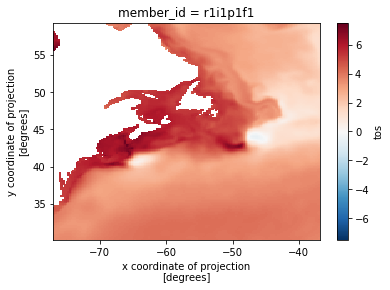

In [94]:
ds_pct_na=ds_pct.isel(x=slice(890,1050),y=slice(630,800),member_id=-1)
ds_cnt_na=ds_cnt.isel(x=slice(890,1050),y=slice(630,800),member_id=-1)
sst_pct=ds_pct_na.tos.mean(axis=0)
sst_cnt=ds_cnt_na.tos.mean(axis=0)
sst_diff=sst_pct-sst_cnt
sst_diff.plot()

In [93]:
sst_diff.shape

(170, 160)

(array([301033., 631959., 833521., 710563., 561902., 803537., 902822.,
        631926., 487804.,  62333.]),
 array([-1.9993237,  1.208225 ,  4.415774 ,  7.6233225, 10.830872 ,
        14.038421 , 17.24597  , 20.453518 , 23.661066 , 26.868616 ,
        30.076164 ], dtype=float32),
 <a list of 10 Patch objects>)

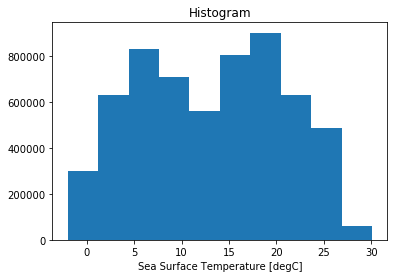

In [60]:
ds_na=ds.isel(x=slice(890,1050),y=slice(630,800),member_id=-1)
%ds_na.tos.plot()

In [66]:
dum=(ds_na.time-ds_na.time[0])/365
dum.shape
dum

<xarray.DataArray 'time' (time: 300)>
array([0.00000000e+00, 8.08219178e-02, 1.61643836e-01, 2.45205479e-01,
       3.28767123e-01, 4.12328767e-01, 4.95890411e-01, 5.80821918e-01,
       6.64383562e-01, 7.47945205e-01, 8.31506849e-01, 9.15068493e-01,
       1.00000000e+00, 1.08082192e+00, 1.16164384e+00, 1.24520548e+00,
       1.32876712e+00, 1.41232877e+00, 1.49589041e+00, 1.58082192e+00,
       1.66438356e+00, 1.74794521e+00, 1.83150685e+00, 1.91506849e+00,
       2.00000000e+00, 2.08082192e+00, 2.16164384e+00, 2.24520548e+00,
       2.32876712e+00, 2.41232877e+00, 2.49589041e+00, 2.58082192e+00,
       2.66438356e+00, 2.74794521e+00, 2.83150685e+00, 2.91506849e+00,
       3.00000000e+00, 3.08082192e+00, 3.16164384e+00, 3.24520548e+00,
       3.32876712e+00, 3.41232877e+00, 3.49589041e+00, 3.58082192e+00,
       3.66438356e+00, 3.74794521e+00, 3.83150685e+00, 3.91506849e+00,
       4.00000000e+00, 4.08082192e+00, 4.16164384e+00, 4.24520548e+00,
       4.32876712e+00, 4.41232877e+00, 